### STAT 207 Lab 3: Sampling, Looping and Simulation

Due: Wednesday, September 18, 23:59:59

### Jaewon Kim jaewonk3

This lab consists of 4 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Note: not every problem in this lab require Python calculation. In some cases you can just work it out and type in your solution.** 


### Part 1 (10 pts)
 

**a) Create and display a data frame that has two columns: 'side' with the entries 1, 2, ..., 6; and 'value' with the entries -1, -1, -1, 1, 1, 1.**

In [1]:
import pandas as pd
import numpy as np
side = [1, 2, 3, 4, 5, 6]
value = [-1, -1, -1, 1, 1, 1]
df = pd.DataFrame({'Side': side, 'Value': value})
df

,Side,Value
0,1,-1
1,2,-1
2,3,-1
3,4,1
4,5,1
5,6,1


**b) If we select one row at random, what is the probability that 'side' = 5 or 6 (like rolling a die)?**

Solution:
1) Number of rows = 6
2) Choosing one row
3) Probability of picking 5 = 1/6, Probability of picking 6 = 1/6
4) Probability of picking 5 + Probability of picking 6 = 1/6 + 1/6 = 2/6 = 1/3
1/3

**c) If we select two rows at random with replacement (like rolling two dice), what is the probability of getting two 1's?**

Solution:
1) Number of rows = 6
2) Choosing two rows with replacement
3) Probability of picking 1 = 1/6
4) Probability of picking 1 * Probability of picking 1 = 1/6 * 1/6 = 1/36 
1/36

**d) We select two rows at random with replacement and we add the values for those two rows. What is the probability that the total value of the two draws = -2?**

Solution:
1) Number of rows = 6
2) Choosing two rows with replacement
3) In order to make the sum of two values -2, we have to pick two -1s.
4) Probability of picking -1 = 3/6 = 1/2
5) Probability of picking -1 * Probability of picking -1 = 1/2 * 1/2 = 1/4 
1/4

**e) We select two rows at random without replacement. What is the probability that the total of their values = -2?**

Solution:
1) Number of rows = 6
2) Choosing two rows without replacement
3) In order to make the sum of two values -2, we have to pick two -1s.
4) Probability of picking -1 for first time = 3/6 = 1/2
5) Probability of picking -1 for second time = 2/5
6) Probability of picking -1 for first time * Probability of picking -1 for second time = 1/2 * 2/5 = 2/10 = 1/5 
1/5

### Part 2 (10 pts)

**a) Using your data frame from Part 1, use Python to select two rows at random with replacement and compute the sum of the 'side' numbers. (this is like rolling the dice and counting the number of dots). Display the sum.**

In [2]:
df['Side'].sample(2, replace = True).sum()

9

**b) Write a loop to repeat the following process 20 times:  make two draws at random with replacement, and sum the two 'side' numbers. This is like rolling a pair of dice 20 times and counting the total number of dots each time. Store your results in a data frame or array and display them.**

In [3]:
a = []
for i in range(20):
    a.append(df['Side'].sample(2, replace = True).sum())
df2 = pd.DataFrame({'Result': a})
df2

,Result
0,6
1,9
2,9
3,5
4,4
5,8
6,7
7,9
8,12
9,7


**c) Make a density histogram of the sums you got in b)** 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df2['Result'], density = True)
plt.show()

<Figure size 640x480 with 1 Axes>

**d) Write a loop to repeat the following process 1000 times: make two draws at random with replacement and sum the two 'side' numbers. Store your results in an array or data frame and make a density histogram of the 1000 sums.**

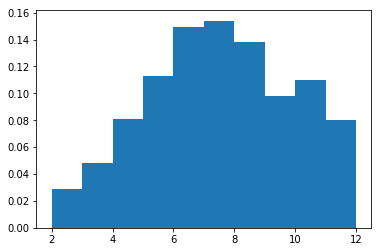

In [5]:
N = 1000
b = []
for i in range(N):
    b.append(df['Side'].sample(2, replace = True).sum())
df3 = pd.DataFrame({'Result': b})
plt.hist(df3['Result'], density = True)
plt.show()

### Part 3 (5 pts)

**Create a python function that you can use to simulate the process of drawing n numbers at random from an array of numbers and taking the median of the numbers. Your function should allow M repetitions of this process and return the M medians obtained. Demonstrate the function using your data frame above ('sides') for the cases:**

+ **n=1, M=10: show output**

+ **n=10, M=10: show output**

+ **n=10, M=1000: just show frequency histogram of output**

In [6]:
def genie(df, x = 'Side', replace = True, n = 1, M = 1):
    gstats = []
    for i in range(M):
        gstats.append(df['Side'].sample(n, replace = True).median())
    return pd.DataFrame({x: gstats})

In [7]:
genie(df, x = 'Side')

,Side
0,5.0


In [8]:
genie(df, x = 'Side', n = 1, M = 10)

,Side
0,2.0
1,5.0
2,3.0
3,6.0
4,4.0
5,6.0
6,2.0
7,6.0
8,1.0
9,1.0


In [9]:
genie(df, x = 'Side', n = 10, M = 10)

,Side
0,3.0
1,3.0
2,3.0
3,4.5
4,3.5
5,2.0
6,6.0
7,3.5
8,2.0
9,2.5


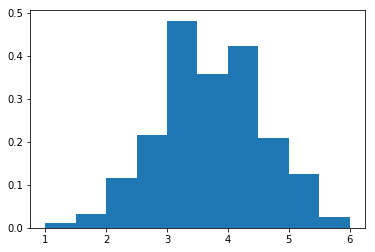

In [10]:
Montecarlos = genie(df, x = 'Side', n = 10, M = 1000)
plt.hist(Montecarlos['Side'], density = True)
plt.show()